In [5]:
# read in the data from the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in the data from the csv file
data=pd.read_csv("/Users/liufanling/Library/CloudStorage/OneDrive-个人/1 UC DAVIS/2024 Summer/CSRA/MEA_Analysis/Outputs/SYNGAP_T1/Activity/Compiled_ActivityScan.csv")

In [22]:
# check unique chip IDs
chip_ids = data['Chip_ID'].unique()
chip_ids

array(['M06691', 'M07036', 'M07301', 'M07309'], dtype=object)

In [6]:
# Screening criteria
# criteria 1: screen CHIP_ID with Active_area consistently smaller than 35 across all 'DIV'
grouped_data = data.groupby(['Chip_ID', 'Well'])

# Filter out groups where all Active_area values are less than 35
data_screen = grouped_data.filter(lambda x: all(x['Active_area'] < 35))

# Display the filtered data
data_screen_unique_units = data_screen.drop_duplicates(subset=['Chip_ID', 'Well'])
data_screen_unique_units

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
11,7,4,6,HET,25-Mar-2024 13:49:55,M07036,1.67575,41.449051,7.909091


In [48]:
# Criteria 2: Filter out groups where any Active_area values are less than 35 after DIV 4 and DIV 7

# subset drop div 4 and div 7
data_subset = data[data['DIV'] > 7]

data_screen = data_subset[data_subset['Active_area']<=35]

data_screen_unique_units = data_screen[['Chip_ID', 'Well']].drop_duplicates()

# Display the unique combinations
print(data_screen_unique_units)

    Chip_ID  Well
59   M07036     6
66   M07309     1
68   M07309     3
152  M07036     3
156  M07301     1
163  M07309     2


In [61]:
data_screen

,Chip_ID,Well,DIV,Active_area
59,M07036,6,12,17.424242
66,M07309,1,12,34.045455
68,M07309,3,12,33.333333
83,M07036,6,15,26.484848
90,M07309,1,15,34.666667
107,M07036,6,19,19.469697
116,M07309,3,19,33.621212
131,M07036,6,22,11.106061
138,M07309,1,22,29.515152
140,M07309,3,22,32.303030


<Figure size 1400x1000 with 0 Axes>

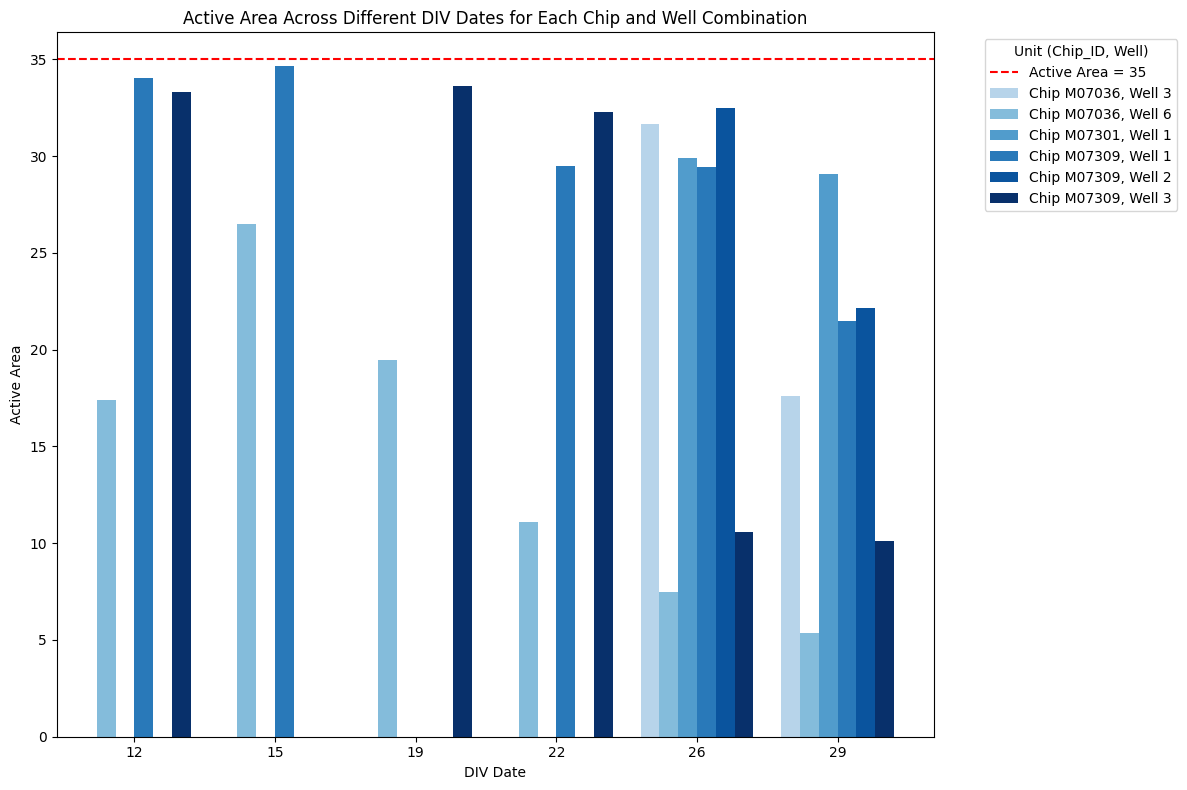

In [65]:
# Plotting the active area across different DIV dates for each Chip and Well combination
pivot_data = data_screen.pivot_table(index=['DIV'], columns=['Chip_ID', 'Well'], values='Active_area')
num_units = len(pivot_data.columns)
# Generating different shades of blue for each unit
colors = plt.cm.Blues(np.linspace(0.3, 1, num_units))

# Adjusting the plot to make the bars from different units at the same DIV distribute side by side in a vertical orientation
plt.figure(figsize=(14, 10))

# Re-calculating the pivot data since it seems not in scope here


# Define the number of units and calculate the width of each bar based on the number of units
num_units = len(pivot_data.columns)
total_width = 0.8  # Total space allocated for all bars at each DIV date
bar_width = total_width / num_units  # Width of each individual bar

# Plot setup
plt.figure(figsize=(12, 8))

# Plotting
for index, (column, series) in enumerate(pivot_data.items()):
    # Position each bar based on its order in the dataframe
    positions = [x - (total_width - bar_width) / 2 + index * bar_width for x in range(len(pivot_data))]
    plt.bar(positions, series.values, width=bar_width, color=colors[index], label=f'Chip {column[0]}, Well {column[1]}')

# Adding a horizontal dashed line at Active Area = 35 for reference
plt.axhline(y=35, color='r', linestyle='--', linewidth=1.5, label='Active Area = 35')

# Labeling and aesthetics
plt.xlabel('DIV Date')
plt.ylabel('Active Area')
plt.title('Active Area Across Different DIV Dates for Each Chip and Well Combination')
plt.xticks(range(len(pivot_data)), pivot_data.index)  # Set x-ticks to be the DIV dates
plt.legend(title="Unit (Chip_ID, Well)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

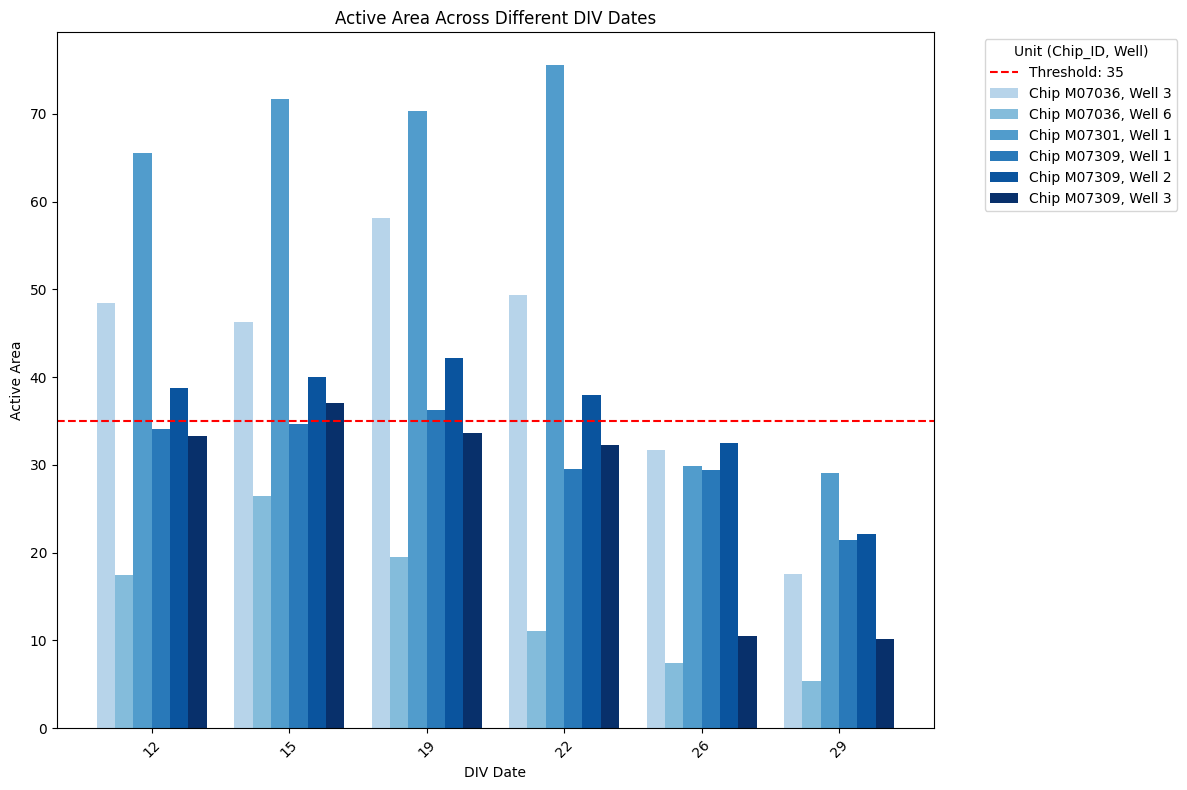

In [75]:
# Include all DIV data for units with Active_area <= 35

units_with_low_area = data_subset[data_subset['Active_area'] <= 35][['Chip_ID', 'Well']].drop_duplicates()

# Filter the original dataset to include all DIV data for these units
filtered_data = data_subset.merge(units_with_low_area, on=['Chip_ID', 'Well'])

# Create a pivot table
pivot_data = filtered_data.pivot_table(index='DIV', columns=['Chip_ID', 'Well'], values='Active_area', aggfunc='first')

# Plot setup
num_units = len(pivot_data.columns)
colors = plt.cm.Blues(np.linspace(0.3, 1, num_units))
total_width = 0.8  # Total width for bars at each DIV date
bar_width = total_width / num_units  # Width of each bar

# Plot setup
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, num_units))

total_width = 0.8
bar_width = total_width / len(pivot_data.columns)

# Plotting each set of bars
for i, ((chip_id, well), series) in enumerate(pivot_data.items()):
    # Offset positions for each bar group
    positions = np.arange(len(pivot_data)) - (total_width - bar_width) / 2 + i * bar_width
    plt.bar(positions, series, width=bar_width, color=colors[i], label=f'Chip {chip_id}, Well {well}')

# Adding the horizontal line and labels
plt.axhline(y=35, color='red', linestyle='--', label='Threshold: 35')
plt.xlabel('DIV Date')
plt.ylabel('Active Area')
plt.title('Active Area Across Different DIV Dates')
plt.xticks(np.arange(len(pivot_data)), pivot_data.index, rotation=45)
plt.legend(title="Unit (Chip_ID, Well)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

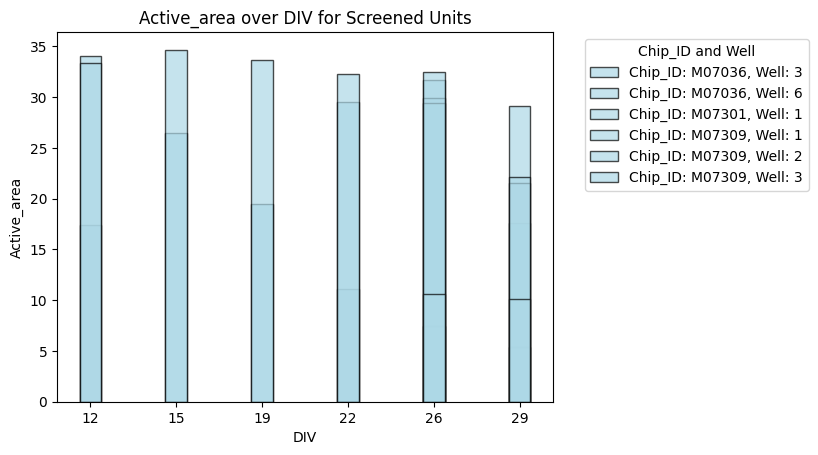

In [71]:
# Get unique DIV values and normalize them to be evenly spaced
div_values = sorted(data_screen['DIV'].unique())
normalized_div = np.linspace(0, 1, len(div_values))

# Create a mapping from actual DIV values to normalized values
div_mapping = {div: norm_div for div, norm_div in zip(div_values, normalized_div)}

# Plotting the screened units using a bar plot
fig, ax = plt.subplots()

for (chip_id, well), group in data_screen.groupby(['Chip_ID', 'Well']):
    # Map the DIV values to the normalized scale
    normalized_group_div = group['DIV'].map(div_mapping)
    ax.bar(normalized_group_div, group['Active_area'], 
           label=f'Chip_ID: {chip_id}, Well: {well}', 
           color='lightblue', 
           width=0.05,  # Adjust width for normalized scale
           alpha=0.7, 
           edgecolor='black')  # Add black edge to the bars

# Set x-axis ticks to the normalized values and label them with the original DIV values
ax.set_xticks(normalized_div)
ax.set_xticklabels(div_values)

ax.set_xlabel('DIV')
ax.set_ylabel('Active_area')
ax.set_title('Active_area over DIV for Screened Units')
ax.legend(title='Chip_ID and Well', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)  # Eliminate the grid

plt.show()

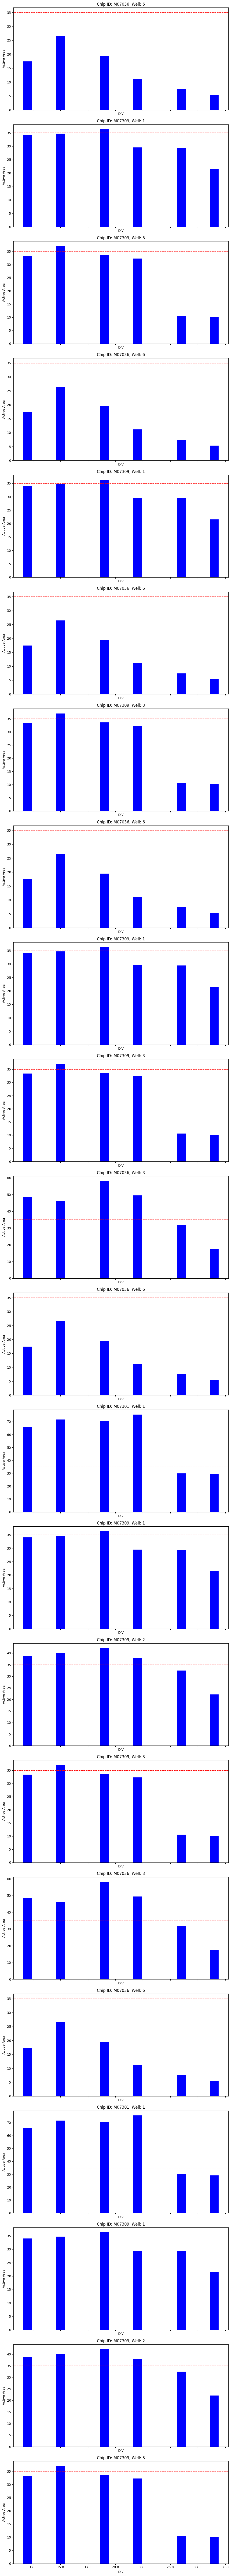

In [57]:
# Correcting the syntax error in the f-string for setting plot titles and generating the plots

fig, axs = plt.subplots(nrows=len(data_screen_unique_units), ncols=1, figsize=(10, 5 * len(data_screen_unique_units)), sharex=True)

# Ensure axs is iterable if there's only one plot
if len(data_screen_unique_units) == 1:
    axs = [axs]

for ax, (idx, row) in zip(axs, data_screen_unique_units.iterrows()):
    # Extract the full data for this specific unit from the original dataset
    unit_data = data_subset[(data_subset['Chip_ID'] == row['Chip_ID']) & (data_subset['Well'] == row['Well'])]
    ax.bar(unit_data['DIV'], unit_data['Active_area'], color='b')
    ax.axhline(y=35, color='r', linestyle='--', linewidth=1)
    ax.set_title(f"Chip ID: {row['Chip_ID']}, Well: {row['Well']}")
    ax.set_xlabel('DIV')
    ax.set_ylabel('Active Area')

plt.tight_layout()
plt.show()